#**The Sparks Foundation- Graduate Rotational Internship Program**

##**Task 6- Prediction using Decision Tree Algorithm**

### **Name:** Pavithraa Sundararaman

### **Domain:** Data Science and Business Analytics

### **June 2024 batch**

##**Step 1: Data Preprocessing**

In [1]:
# importing the necessary modules
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import tree

In [2]:
# importing the dataset from the url
data = pd.read_csv("/content/drive/MyDrive/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# checking the basic details of the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# checking for null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.shape

(150, 6)

# **Step 2: Data Visualisation**

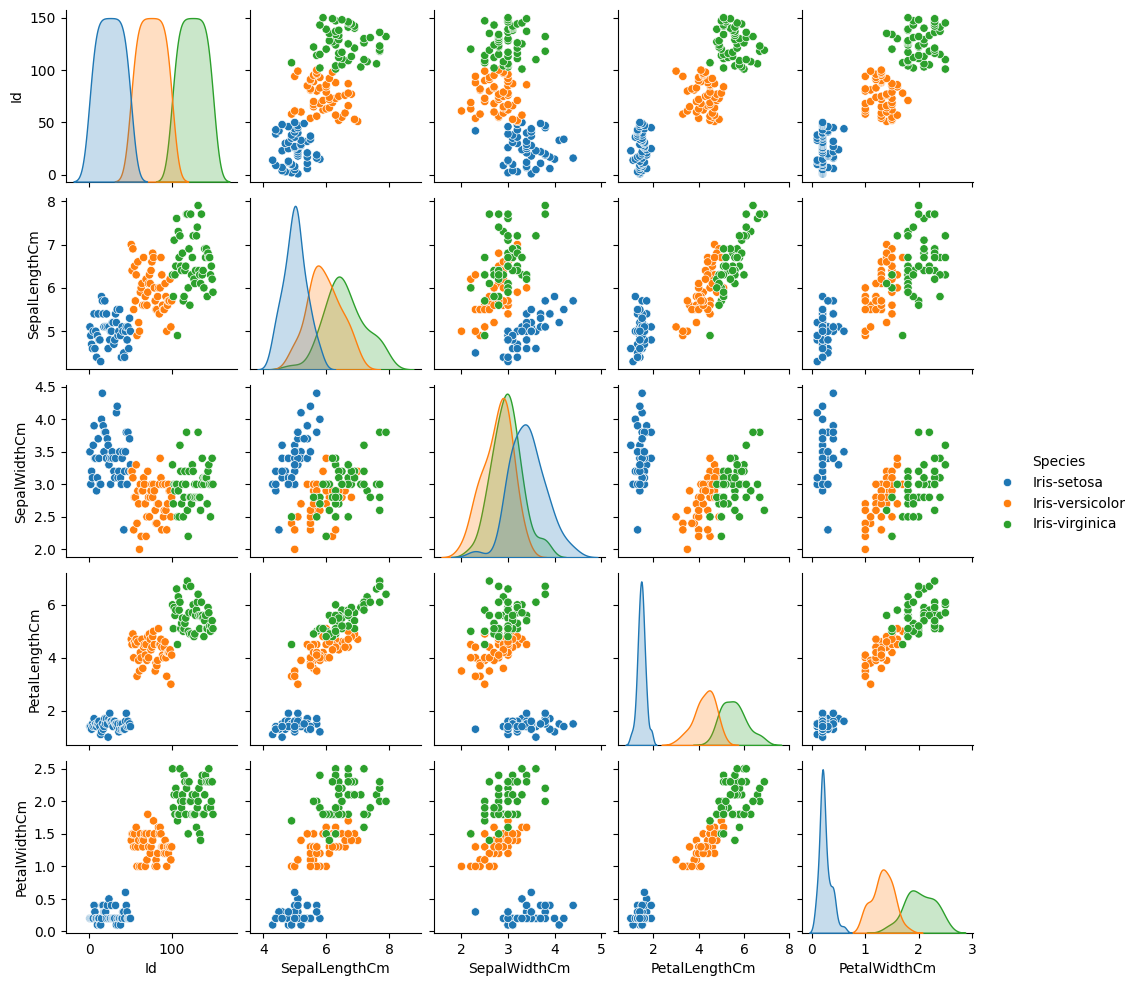

In [7]:
# visualizing the distribution of species based on different variables
sns.pairplot(data, height=2, hue="Species")

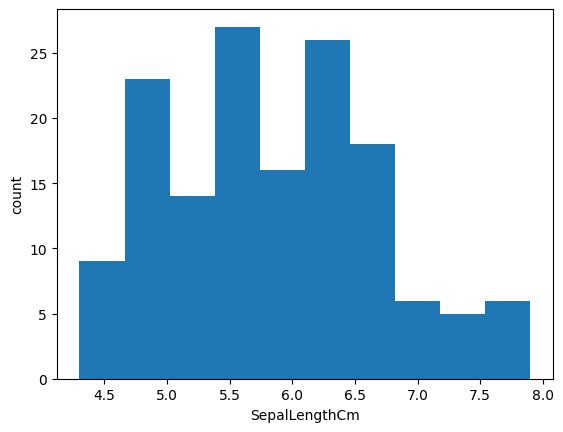

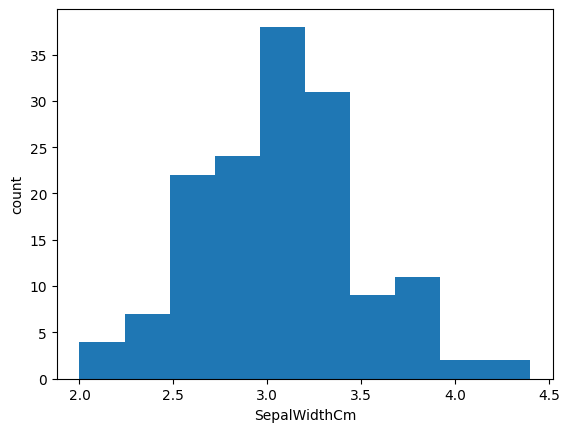

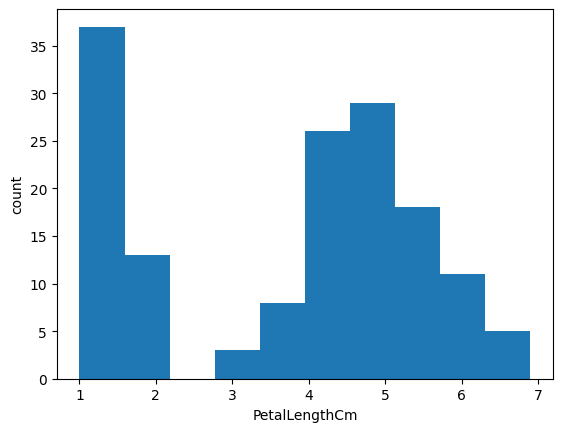

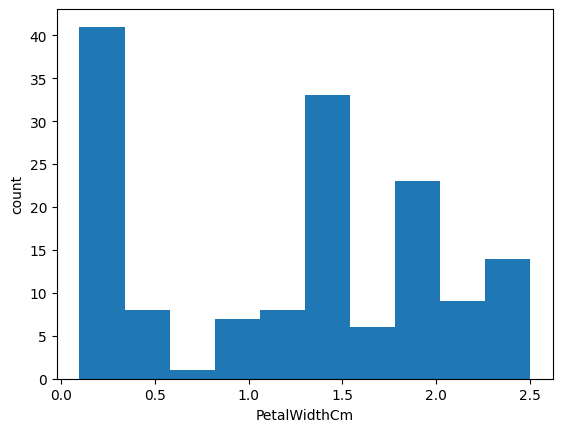

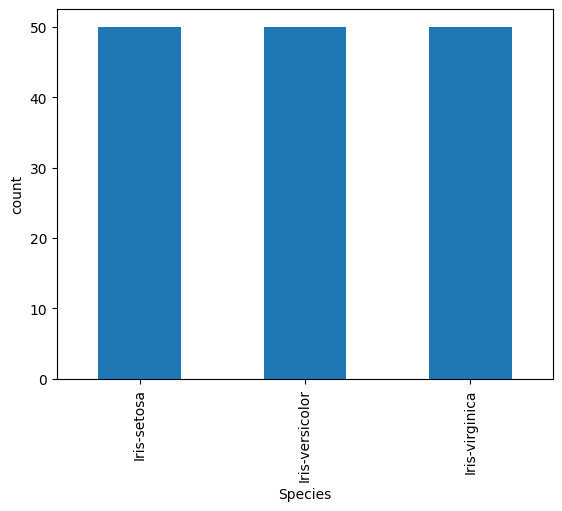

In [8]:
# storing all column names in a list to iterate
col=list(data.columns)

# visualizing all the numerical features using a histogram (all independent variables except Id)
# and the categorical variable (Species variable) using a barplot
for col_name in col:
    if col_name != 'Species':
      if col_name == 'Id':
        pass
      else:
        plt.hist(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()
    else:
      data[col_name].value_counts().plot(kind='bar')
      plt.xlabel(col_name)
      plt.ylabel('count')
      plt.show()

# **Step 3: Train and Test Split**

In [9]:
# splitting the data into train and test sets
X = data.drop("Species",axis=1)
y = data["Species"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state= 1)

# **Step 4: Hyperparameter Tuning, Model Building and Visualization**

GridSearchCV is a tool which helps determine the best hyperparameters values to achieve maximum accuracy with our model for the given data.

In this case, the **Decision Tree Classifier** model is used as it is a classification problem.

In [10]:
# using GridSearchCV to determine the hyperparameter values
dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : [2,3,4,5,6],
        'min_samples_split': [2,3,4,5,6],
        'min_samples_leaf': [1,2,3,4,5,6]}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Hence, as per GridSearchCV, the below will be the hyperparameter values used to define the **Decision Tree Classifier**:


*   **max_depth: 2**
*   **min_samples_leaf: 1**
*   **min_samples_split: 2**



In [11]:
# building the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=1, max_depth=2, min_samples_leaf=1, min_samples_split=2)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [12]:
# predicting the values for train and test set
y_pred_train = dt_model.predict(X_train)
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)

In [13]:
# putting the feature names and class names into variables
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

[Text(0.6, 0.8333333333333334, 'sepal length (cm) <= 99.5\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]\nclass = virginica'),
 Text(0.4, 0.5, 'petal width (cm) <= 2.6\ngini = 0.498\nsamples = 68\nvalue = [36, 32, 0]\nclass = setosa'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = virginica')]

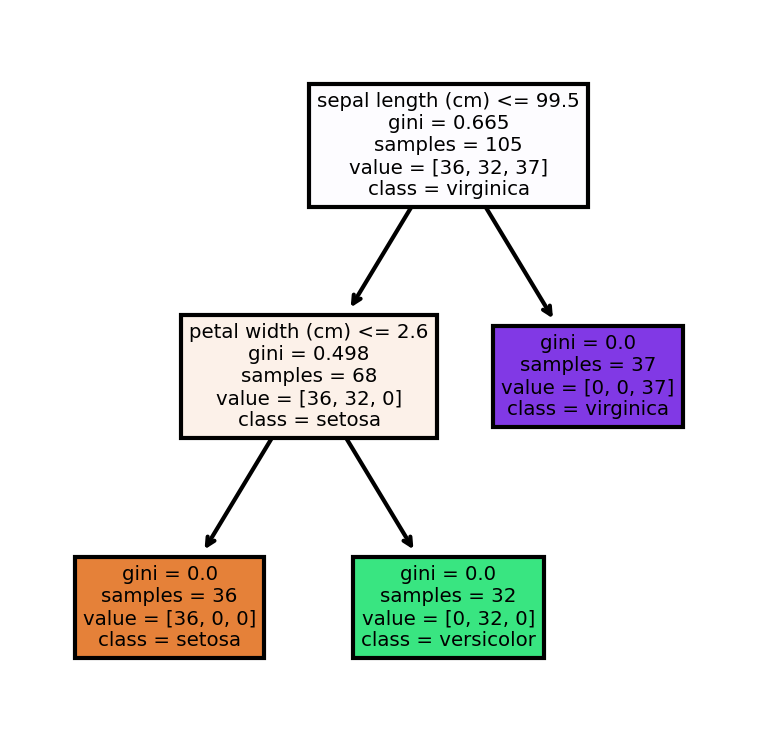

In [14]:
# visualizing the tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (3,3), dpi = 300)

tree.plot_tree(dt_model,
               feature_names = fn,
               class_names=cn,
               filled = True)

# **Step 5: Evaluation of the Model**

In [15]:
# printing the accuracy of the model on the train and test sets
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.9777777777777777


In [16]:
# classification report showing accuracy in classification for each category
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



Therefore, the built model was able to achieve an accuracy of **98%**